In [45]:
# Import libraries

import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score,precision_score,recall_score, f1_score

In [2]:
X_train= pd.read_csv('/Users/cuicuisong/Desktop/data/X_train_aggregated.csv',  index_col=0)
X_test= pd.read_csv('/Users/cuicuisong/Desktop/data/X_test_aggregated.csv',  index_col=0)
y_train= pd.read_csv('/Users/cuicuisong/Desktop/data/y_train_agg.csv')
y_test= pd.read_csv('/Users/cuicuisong/Desktop/data//y_test_agg.csv')

In [3]:
X_train.head()

,DeductibleAmtPaid_mean,DeductibleAmtPaid_max,NoOfMonths_PartACov_mean,NoOfMonths_PartBCov_mean,OPAnnualReimbursementAmt_mean,OPAnnualReimbursementAmt_max,OPAnnualReimbursementAmt_sum,OPAnnualDeductibleAmt_mean,OPAnnualDeductibleAmt_max,OPAnnualDeductibleAmt_sum,...,Chronic_KidneyDisease_Frac,Chronic_Cancer_Frac,Chronic_ObstrPulmonary_Frac,Chronic_Depression_Frac,Chronic_Diabetes_Frac,Chronic_IschemicHeart_Frac,Chronic_Osteoporasis_Frac,Chronic_rheumatoidarthritis_Frac,Chronic_stroke_Frac,Deceased_Frac
Provider,,,,,,,,,,,,,,,,,,,,,
PRV53960,2.452381,200.0,12.000000,12.000000,3279.214286,43330,1377270,902.166667,9180,378910,...,0.480952,0.085714,0.242857,0.426190,0.719048,0.773810,0.357143,0.316667,0.040476,0.016667
PRV52517,3.750000,70.0,11.625000,12.000000,2082.500000,6110,66640,537.500000,1530,17200,...,0.375000,0.187500,0.281250,0.343750,0.593750,0.781250,0.218750,0.625000,0.062500,0.000000
PRV55652,1.785714,50.0,12.000000,12.000000,1757.500000,9840,49210,500.357143,3110,14010,...,0.178571,0.107143,0.285714,0.535714,0.714286,0.785714,0.392857,0.321429,0.071429,0.000000
PRV57328,4.473684,70.0,12.000000,12.000000,1498.157895,7400,56930,465.789474,1550,17700,...,0.342105,0.105263,0.236842,0.394737,0.500000,0.631579,0.342105,0.263158,0.078947,0.052632
PRV56721,4.059406,100.0,11.915842,11.881188,2032.673267,24260,410600,599.900990,6300,121180,...,0.430693,0.158416,0.356436,0.485149,0.643564,0.722772,0.321782,0.232673,0.084158,0.000000


In [4]:
y_train.head()

,PotentialFraud
0,0
1,0
2,0
3,0
4,0


In [5]:
display(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(4328, 54)

(1082, 54)

(4328, 1)

(1082, 1)

In [6]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4328 entries, PRV53960 to PRV52602
Data columns (total 54 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   DeductibleAmtPaid_mean            4328 non-null   float64
 1   DeductibleAmtPaid_max             4328 non-null   float64
 2   NoOfMonths_PartACov_mean          4328 non-null   float64
 3   NoOfMonths_PartBCov_mean          4328 non-null   float64
 4   OPAnnualReimbursementAmt_mean     4328 non-null   float64
 5   OPAnnualReimbursementAmt_max      4328 non-null   int64  
 6   OPAnnualReimbursementAmt_sum      4328 non-null   int64  
 7   OPAnnualDeductibleAmt_mean        4328 non-null   float64
 8   OPAnnualDeductibleAmt_max         4328 non-null   int64  
 9   OPAnnualDeductibleAmt_sum         4328 non-null   int64  
 10  ClaimCounts                       4328 non-null   int64  
 11  Gender                            4328 non-null   float64
 12  

In [7]:
y_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4328 entries, 0 to 4327
Data columns (total 1 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   PotentialFraud  4328 non-null   int64
dtypes: int64(1)
memory usage: 33.9 KB


### I. Baseline Model

In [8]:
# Train and test data
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

#### 1.1 Model building and predicting

In [9]:
# use standradscaler and LogisticRegression to build a classification pipeline.
steps = [('rescale',StandardScaler()),
         ('logr', LogisticRegression())]
model = Pipeline(steps)
model = model.fit(X_train, y_train)

In [10]:
# Predicting: Use the predict function of the model to make predictions for the training set and test set
y_train_pred = model.predict(X_train)
y_train_pred

array([0, 0, 0, ..., 0, 0, 0])

In [11]:
# fill NA as 0, X_test has two null values
X_test.fillna(0,inplace=True)
y_test_pred = model.predict(X_test)
y_test_pred 


array([1, 0, 0, ..., 0, 0, 0])

#### 1.2 Calculate the precision, recall, and f1 scores using classification report.

In [50]:
from sklearn.metrics import accuracy_score,precision_score,recall_score, f1_score
precision_train_baseline=precision_score(y_train, y_train_pred)
precision_train_baseline

0.7585034013605442

In [51]:
precision_test_baseline = precision_score(y_test, y_test_pred)
precision_test_baseline

0.7468354430379747

In [12]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

print(classification_report(y_train, y_train_pred))
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      3925
           1       0.76      0.55      0.64       403

    accuracy                           0.94      4328
   macro avg       0.86      0.77      0.80      4328
weighted avg       0.94      0.94      0.94      4328

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       979
           1       0.75      0.57      0.65       103

    accuracy                           0.94      1082
   macro avg       0.85      0.78      0.81      1082
weighted avg       0.94      0.94      0.94      1082



In [13]:
# Get the confusion matrix
print(confusion_matrix(y_train, y_train_pred))
print("-------------")
print(confusion_matrix(y_test, y_test_pred))

[[3854   71]
 [ 180  223]]
-------------
[[959  20]
 [ 44  59]]


#### 1.3 Feature Importance

In [14]:
# calculate the feature score
# model[1]: logisticregression
importance = model[1].coef_[0]        
for i,j in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,j))

Feature: 0, Score: 0.44708
Feature: 1, Score: -0.18934
Feature: 2, Score: 0.10687
Feature: 3, Score: -0.08749
Feature: 4, Score: 0.06220
Feature: 5, Score: -0.05877
Feature: 6, Score: 0.54243
Feature: 7, Score: -0.20867
Feature: 8, Score: 0.04186
Feature: 9, Score: 0.49961
Feature: 10, Score: 0.97208
Feature: 11, Score: 0.02045
Feature: 12, Score: 0.03489
Feature: 13, Score: 0.13070
Feature: 14, Score: -0.37028
Feature: 15, Score: 0.15336
Feature: 16, Score: -0.07001
Feature: 17, Score: -0.69974
Feature: 18, Score: 0.41769
Feature: 19, Score: 0.64988
Feature: 20, Score: 0.20081
Feature: 21, Score: 0.30807
Feature: 22, Score: -0.22073
Feature: 23, Score: -0.26804
Feature: 24, Score: -0.17806
Feature: 25, Score: 0.44383
Feature: 26, Score: 0.29628
Feature: 27, Score: -0.09811
Feature: 28, Score: 0.20931
Feature: 29, Score: -0.00199
Feature: 30, Score: 0.25881
Feature: 31, Score: 0.15612
Feature: 32, Score: -0.05941
Feature: 33, Score: -0.14641
Feature: 34, Score: -0.08232
Feature: 35, Sc

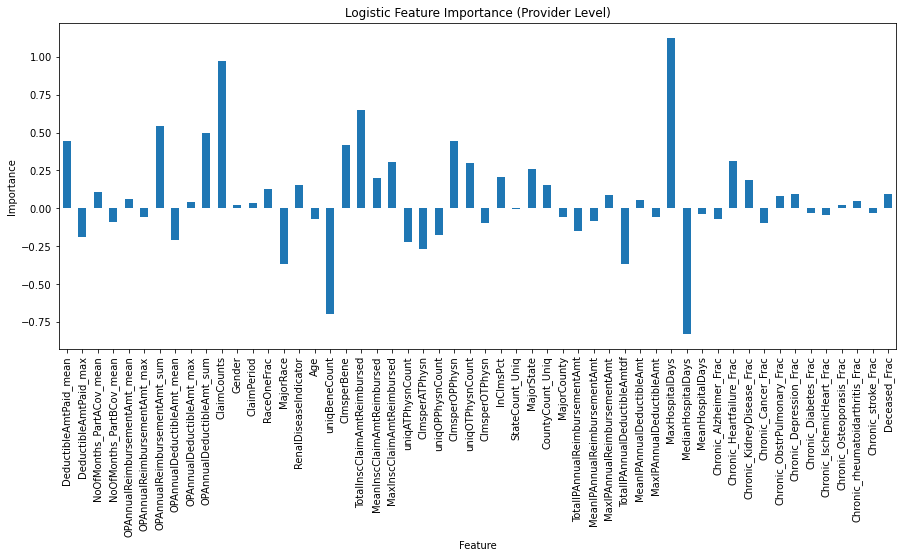

In [15]:
# plot feature importance
feature_names = X_train.columns
feature_importance = (pd.Series(importance, index = feature_names))
plt.figure(figsize=(15,6))
feature_importance.plot.bar()
plt.title('Logistic Feature Importance (Provider Level)')
plt.ylabel('Importance')
plt.xlabel('Feature')
plt.show()




### Drop some related features to compare the model performance with keeing all of features.

In [16]:
# DeduttibleAmtPaid_mean, Drop DeduttibleAmtPaid_max
# OPAnnualReimbursementAmt_sum, drop OPAnnualReimbursementAmt_max,OPAnnualReimbursementAmt_mean
# OPAnnualDeductibleAmt_sum, drop OPAnnualDeductibleAmt_max, OPAnnualDeductibleAmt_mean
# MajorRace, drop RaceOneFrac
# TotalInscClaimAmtReimbursed, drop MaxInscClaimAmtReimbursed, MeanInscClaimAmtReimbursed (different from random forest)
# StateCount_Uniq, drop MajorState
# CountyCount_Uniq, drop MajorCounty
# TotalIPAnnualReimbursementAmt, drop MeanIPAnnualReimbursementAmt, MaxIPAnnualReimbursementAmt
# TotalIPAnnualDeductibleAmt, drop MeanIPAnnualDeductibleAmt, MaxIPAnnualDeductibleAmt
# MaxHospitalDays, drop MedianHospitalDays, MeanHospitalDays
# 



### II. Prediction with balanced class weights

##### 2.1 Set class_weight in Logistic Regression and retrain the model.

In [54]:
steps = [('rescale', StandardScaler()),
         ('logr', LogisticRegression(class_weight = 'balanced'))]
model_balanced = Pipeline(steps)
model_balanced = model_balanced.fit(X_train, y_train)

In [55]:
y_train_pred_balanced = model_balanced.predict(X_train)
y_test_pred_balanced = model_balanced.predict(X_test)

In [56]:
y_test_pred_balanced

array([1, 0, 0, ..., 0, 0, 0])

In [57]:
precision_train_balanced= precision_score(y_train,y_train_pred_balanced )
precision_train_balanced

0.4737516005121639

In [58]:
precision_test_balanced= precision_score(y_test,y_test_pred_balanced )
precision_test_balanced

0.44776119402985076

##### Re-calcualte all the above metrics and confusion matrix.

In [59]:
print(classification_report(y_train, y_train_pred_balanced))
print(classification_report(y_test, y_test_pred_balanced))

# notes: a little smaller than non-balanced model

              precision    recall  f1-score   support

           0       0.99      0.90      0.94      3925
           1       0.47      0.92      0.62       403

    accuracy                           0.90      4328
   macro avg       0.73      0.91      0.78      4328
weighted avg       0.94      0.90      0.91      4328

              precision    recall  f1-score   support

           0       0.99      0.89      0.93       979
           1       0.45      0.87      0.59       103

    accuracy                           0.89      1082
   macro avg       0.72      0.88      0.76      1082
weighted avg       0.93      0.89      0.90      1082



In [21]:
print(confusion_matrix(y_train, y_train_pred_balanced))
print("-------------")
print(confusion_matrix(y_test, y_test_pred_balanced))

[[3514  411]
 [  33  370]]
-------------
[[868 111]
 [ 13  90]]


### III. Use the predict_proba function of the model to make predictions for the training and testing sets

In [31]:
steps = [('rescale', StandardScaler()),
         ('logr', LogisticRegression(class_weight = 'balanced'))]
model_balanced = Pipeline(steps)
model_balanced = model.fit(X_train, y_train)
y_train_pred_balanced = model_balanced.predict(X_train)
y_test_pred_balanced = model_balanced.predict(X_test)

In [61]:
y_train_proba = model.predict_proba(X_train)
y_test_proba = model.predict_proba(X_test)

In [63]:
y_train_proba 

array([[0.73983448, 0.26016552],
       [0.99471248, 0.00528752],
       [0.99643399, 0.00356601],
       ...,
       [0.994268  , 0.005732  ],
       [0.93381537, 0.06618463],
       [0.97885548, 0.02114452]])

In [62]:
y_train_proba_balanced = model_balanced.predict_proba(X_train)
y_test_proba_balanced = model_balanced.predict_proba(X_test)

In [64]:
y_train_proba_balanced

array([[0.09607545, 0.90392455],
       [0.96766832, 0.03233168],
       [0.98394554, 0.01605446],
       ...,
       [0.94268301, 0.05731699],
       [0.58954445, 0.41045555],
       [0.86364282, 0.13635718]])

In [34]:
y_train_proba.shape

(4328, 2)

In [35]:
y_test_proba.shape

(1082, 2)

In [27]:
y_test_proba

# The output from predict is the values of 0 or 1 while the output of predict_prob has two columns: the first column is the probability of predicting 0, the second column is the probability of predicting 1.
# In this case, we should care about the second column, probability of 1.

array([[0.24018689, 0.75981311],
       [0.9927431 , 0.0072569 ],
       [0.96340434, 0.03659566],
       ...,
       [0.96511875, 0.03488125],
       [0.99322588, 0.00677412],
       [0.99829841, 0.00170159]])

In [28]:
# What is the range of the values in y_train_proba and y_test_proba? What do the values mean?
print('The range of y_train_proba is: (', np.min(y_train_proba[:,1]), ',', np.max(y_train_proba[:,1]), ')')
print('The range of y_train_proba is: (', np.min(y_test_proba[:,1]), ',', np.max(y_test_proba[:,1]), ')')

The range of y_train_proba is: ( 1.0867225303671873e-07 , 0.9999999999999973 )
The range of y_train_proba is: ( 1.8359974422312688e-07 , 0.9999725643834634 )


#### 3.2 Threshold

In [29]:
# Change the threshold value applied in the transformation from y_test_proba to y_test_pred, 
# and visualize how the threshold value changes precision, recall, and f1 score.

In [30]:
# Plot metrics scores v.s. threshold - Linda

thresholds = np.linspace(0, 1, 10)
precisions = []
recalls = []
f1s = []
ave = "binary"

for cut in thresholds:
    y_test_pred_new = (y_test_proba[:, 1] > cut).astype(int)
    precisions.append(precision_score(y_test, y_test_pred_new, average=ave))
    recalls.append(recall_score(y_test, y_test_pred_new, average=ave))
    f1s.append(f1_score(y_test, y_test_pred_new, average=ave))

plt.plot(thresholds, precisions, color="red", label="precision")
plt.plot(thresholds, recalls, color="blue", label="recall")
plt.plot(thresholds, f1s, color="black", label="f1")
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.legend(loc="best")

NameError: name 'precision_score' is not defined

In [ ]:
# Cuicui
thresholds = np.arange(0, 1.0, 0.01)
precision_lst=[]
recall_lst=[]
f1_lst = []
for i in thresholds:
    y_test_prednew1= (y_test_proba[:, 1]>= i).astype(int)
    precision_lst.append(precision_score(y_test, y_test_prednew1))
    recall_lst.append(recall_score(y_test, y_test_prednew1))
    f1_lst.append(f1_score(y_test, y_test_prednew1))
plt.title("Precision-Recall vs Threshold Chart")
plt.plot(thresholds, precision_lst, "g-", label="Precision")
plt.plot(thresholds, recall_lst, "b-", label="Recall")
plt.plot(thresholds, f1_lst, "r-", label="f1")
plt.ylabel("Precision, Recall, f1")
plt.xlabel("Threshold")
plt.legend(loc="lower left")
plt.title('Precision, Recall, and f1 Score versus Threshold')

#### 3.3 ROC AUC

##### Calculate the train and test roc_auc_scores.

In [75]:
from sklearn.metrics import roc_auc_score
# baseline
roc_auc_trainbaseline = roc_auc_score(y_train, y_train_proba[:, 1])
roc_auc_trainbaseline

0.9557718385990422

In [76]:
roc_auc_testbaseline = roc_auc_score(y_test, y_test_proba[:, 1])
roc_auc_testbaseline

0.9390898182214862

In [77]:
roc_auc_trainbalanced = roc_auc_score(y_train, y_train_proba_balanced[:, 1])
roc_auc_trainbalanced


0.9577809739058968

In [78]:
roc_auc_testbalanced = roc_auc_score(y_test, y_test_proba_balanced[:, 1])
roc_auc_testbalanced 

0.931304977339667

#### Plot the ROC curve of test scores, use the roc_curve module in sklearn to obtain relevant data.

In [37]:
from sklearn import metrics

fpr, tpr, threshold = metrics.roc_curve(y_test, y_test_proba[:, 1])

Text(0, 0.5, 'true positive rate')

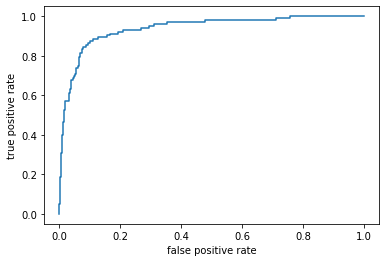

In [38]:
plt.plot(fpr,tpr)
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
# The x axes is the false positive rate (recall or sensitivity) and the y axes is the true positive rate.

PR-AUC is 0.75


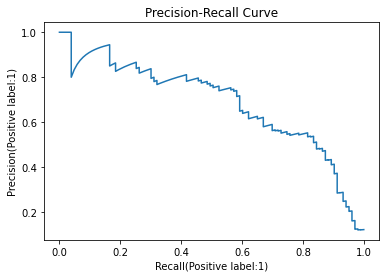

In [110]:
from sklearn.metrics import precision_recall_curve
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_recall_curve.html

from sklearn.metrics import auc,plot_precision_recall_curve
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.auc.html

y_score_train_baseline = y_train_proba[:, 1]
# Data to plot precision - recall curve
precision_trainbaseline, recall_trainbaseline, thresholds_trainbaseline = precision_recall_curve(y_train, y_score_train_baseline )
# Use AUC function to calculate the area under the curve of precision recall curve
auc_precision_recall_trainbaseline = auc(recall_trainbaseline, precision_trainbaseline)
print('PR-AUC is {:.2f}'.format(auc_precision_recall_trainbaseline))

# plot PR curve
plt.plot(recall, precision)
plt.xlabel('Recall(Positive label:1)')
plt.ylabel('Precision(Positive label:1)')
plt.title('Precision-Recall Curve')
plt.show()

In [125]:
precision_trainbaseline, recall_trainbaseline, thresholds_trainbaseline = precision_recall_curve(y_train, y_score_train_baseline )
# Use AUC function to calculate the area under the curve of precision recall curve
PR_AUC_trainbaseline = auc(recall_trainbaseline, precision_trainbaseline)
PR_AUC_trainbaseline

0.7548213894007616

PR-AUC is 0.70


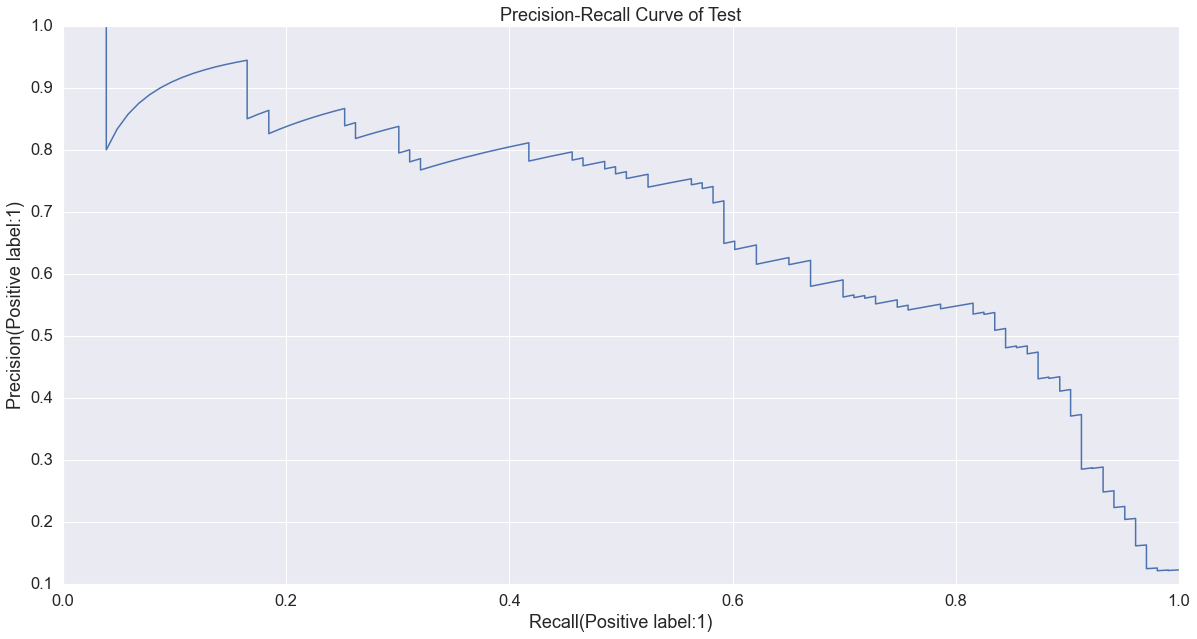

AttributeError: module 'matplotlib.pyplot' has no attribute 'set_facecolor'

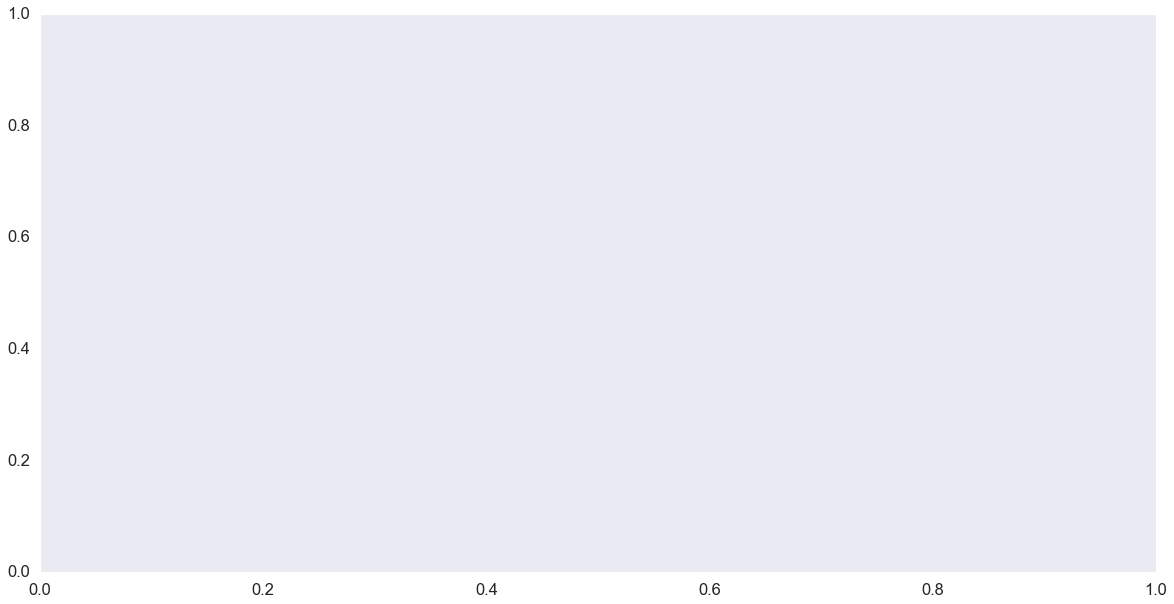

In [163]:
from sklearn.metrics import precision_recall_curve
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_recall_curve.html

from sklearn.metrics import auc,plot_precision_recall_curve
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.auc.html

y_score_test_baseline  = y_test_proba[:, 1]
# Data to plot precision - recall curve
precision_testbaseline, recall_testbaseline, thresholds = precision_recall_curve(y_test, y_score_test_baseline )
# Use AUC function to calculate the area under the curve of precision recall curve
auc_precision_recall_testbaseline = auc(recall_testbaseline, precision_testbaseline)
print('PR-AUC is {:.2f}'.format(auc_precision_recall_testbaseline))

# plot PR curve
ax = plt.plot(recall, precision)
plt.xlabel('Recall(Positive label:1)')
plt.ylabel('Precision(Positive label:1)')
plt.title('Precision-Recall Curve of Test')
ax.grid(False)
ax.set_facecolor('white')
plt.show()
ax.grid(False)
ax.set_facecolor('white')
#disp = plot_precision_recall_curve(model, X_test, y_test)

In [132]:
precision_testbaseline, recall_testbaseline, thresholds = precision_recall_curve(y_test, y_score_test_baseline )
# Use AUC function to calculate the area under the curve of precision recall curve
PR_AUC_testbaseline = auc(recall_testbaseline, precision_testbaseline)
PR_AUC_testbaseline 

0.6978401142332711

PR-AUC is 0.69


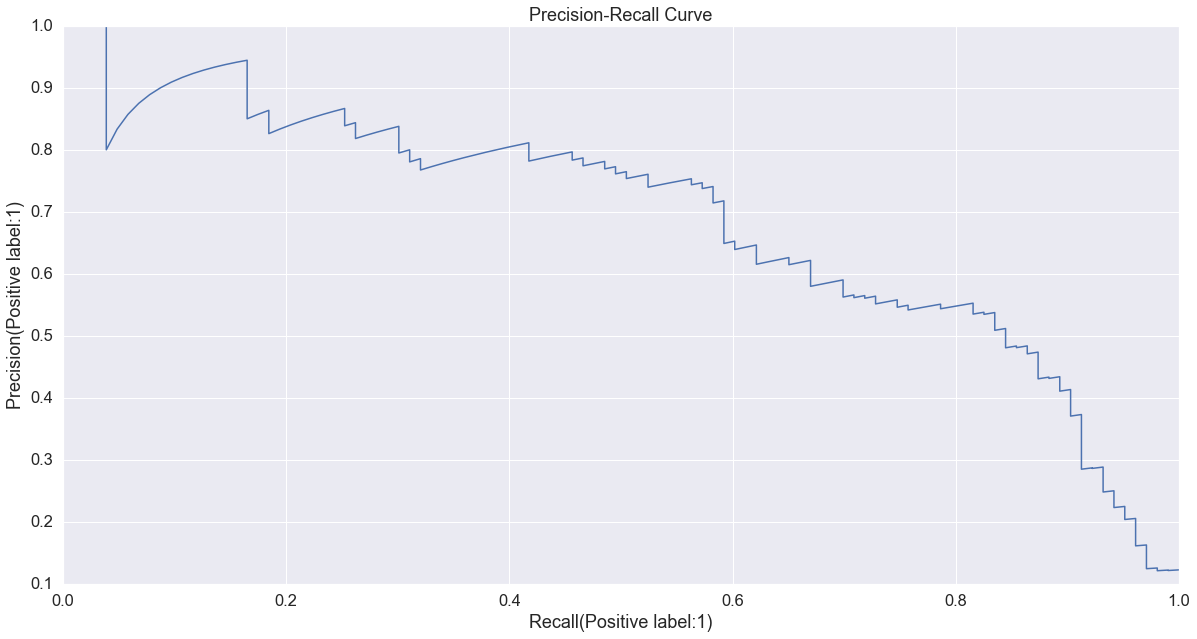

In [211]:
# Balanced train PR-AUC

from sklearn.metrics import precision_recall_curve
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_recall_curve.html

from sklearn.metrics import auc,plot_precision_recall_curve
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.auc.html

y_score_trainbalanced = y_train_proba_balanced[:, 1]
# Data to plot precision - recall curve
precision_trainbalanced, recall_trainbalanced, thresholds = precision_recall_curve(y_train, y_score_trainbalanced)
# Use AUC function to calculate the area under the curve of precision recall curve
auc_precision_recall_trainbalanced = auc(recall_trainbalanced, precision_trainbalanced)
print('PR-AUC is {:.2f}'.format(auc_precision_recall))

# plot PR curve
plt.plot(recall, precision)
plt.xlabel('Recall(Positive label:1)')
plt.ylabel('Precision(Positive label:1)')
plt.title('Precision-Recall Curve')
plt.show()

In [122]:
y_score_trainbalanced = y_train_proba_balanced[:, 1]
precision_trainbalanced, recall_trainbalanced, thresholds = precision_recall_curve(y_train, y_score_trainbalanced)
# Use AUC function to calculate the area under the curve of precision recall curve
PR_AUC_trainbalanced = auc(recall_trainbalanced, precision_trainbalanced)
PR_AUC_trainbalanced

0.7422326909596593

PR-AUC is 0.69


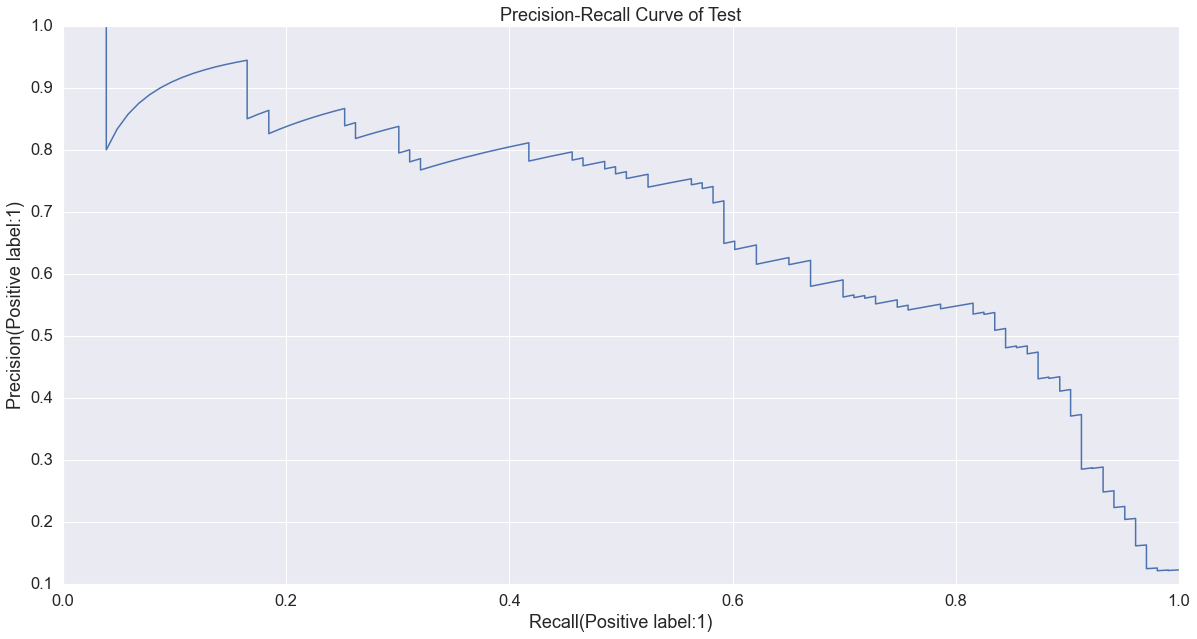

In [210]:
# Balanced train PR-AUC

from sklearn.metrics import precision_recall_curve
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_recall_curve.html

from sklearn.metrics import auc,plot_precision_recall_curve
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.auc.html

y_score_testbalanced = y_test_proba_balanced[:, 1]
# Data to plot precision - recall curve
precision_testbalanced, recall_testbalanced, thresholds = precision_recall_curve(y_test, y_score_testbalanced)
# Use AUC function to calculate the area under the curve of precision recall curve
auc_precision_recall_testbalanced = auc(recall_testbalanced, precision_testbalanced)
print('PR-AUC is {:.2f}'.format(auc_precision_recall))

# plot PR curve
plt.plot(recall, precision)
plt.xlabel('Recall(Positive label:1)')
plt.ylabel('Precision(Positive label:1)')
plt.title('Precision-Recall Curve of Test')
plt.show()

In [129]:
precision_testbalanced, recall_testbalanced, thresholds_testbalanced = precision_recall_curve(y_test, y_score_testbalanced)
PR_AUC_testbalanced = auc(recall_testbalanced, precision_testbalanced)
PR_AUC_testbalanced

0.6855704042059234

#### 3.4 Log Loss

##### Calculate the train and test log loss.

In [43]:
from sklearn.metrics import log_loss
log_loss(y_train, y_train_proba)

0.14022124100160654

In [44]:
log_loss(y_test, y_test_proba)

0.1637931774847622

In [73]:
# precision_train_baseline precision_test_baseline
# precision_train_balanced precision_test_balanced
# roc_auc_trainbaseline roc_auc_testbaseline 
# roc_auc_trainbalanced roc_auc_testbalanced 

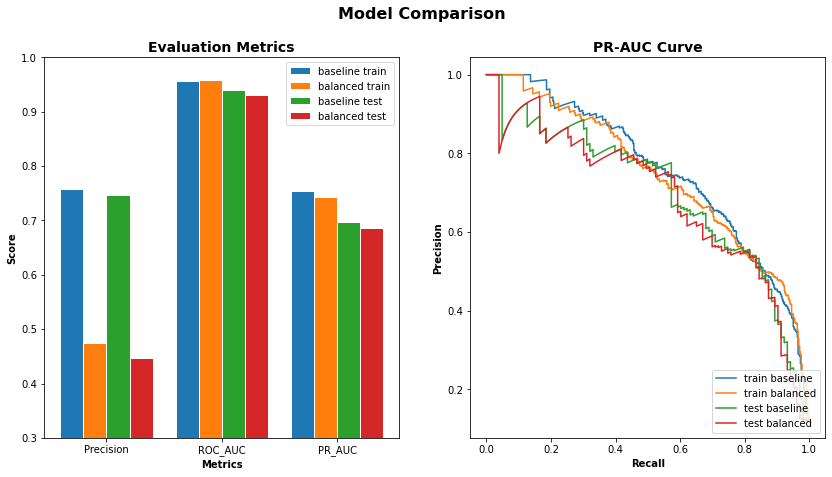

In [143]:
# Intitialize figure with two plots
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Model Comparison', fontsize=16, fontweight='bold')
fig.set_figheight(7)
fig.set_figwidth(14)
fig.set_facecolor('white')



barWidth = 0.2
baseline_train_score = [precision_train_baseline,  roc_auc_trainbaseline, PR_AUC_trainbaseline]
balanced_train_score = [precision_train_balanced,roc_auc_trainbalanced, PR_AUC_trainbalanced  ]
# downsam_train_score = [precision_train_downsam, roc_auc_traindownsam , PR_AUC_traindownsam]
baseline_test_score = [precision_test_baseline, roc_auc_testbaseline, PR_AUC_testbaseline ]
balanced_test_score = [precision_test_balanced, roc_auc_testbalanced, PR_AUC_testbalanced ]
# downsam_test_score = [precision_test_downsam, roc_auc_testdownsam , PR_AUC_testdownsam]

## Set position of bar on X axis
r1 = np.arange(len(baseline_train_score))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
#r5 = [x + barWidth for x in r4]
#r6 = [x + barWidth for x in r5]

# Make the plot
ax1.bar(r1, baseline_train_score, width=barWidth, edgecolor='white', label='baseline train')
ax1.bar(r2, balanced_train_score , width=barWidth, edgecolor='white', label='balanced train')
#ax1.bar(r3, downsam_train_score , width=barWidth, edgecolor='white', label='downsampling train')
ax1.bar(r3, baseline_test_score , width=barWidth, edgecolor='white', label='baseline test')
ax1.bar(r4, balanced_test_score , width=barWidth, edgecolor='white', label='balanced test')
# ax1.bar(r6, downsam_test_score  , width=barWidth, edgecolor='white', label='downsampling test')

## Configure x and y axis
ax1.set_xlabel('Metrics', fontweight='bold')
labels = ['Precision', 'ROC_AUC', 'PR_AUC']
ax1.set_xticks([r + (barWidth * 1.5) for r in range(len(baseline_train_score))], )
ax1.set_xticklabels(labels)
ax1.set_ylabel('Score', fontweight='bold')
ax1.set_ylim(0.3, 1)

## Create legend & title
ax1.set_title('Evaluation Metrics', fontsize=14, fontweight='bold')
ax1.legend()



# Second plot
## Comparing PR-AUC Curve
ax2.plot(recall_trainbaseline, precision_trainbaseline, label='train baseline')
ax2.plot(recall_trainbalanced, precision_trainbalanced, label='train balanced')
ax2.plot(recall_testbaseline, precision_testbaseline, label='test baseline')
ax2.plot(recall_testbalanced, precision_testbalanced, label='test balanced')


## Configure x and y axis
ax2.set_xlabel('Recall', fontweight='bold')
ax2.set_ylabel('Precision', fontweight='bold')
ax1.set_ylim(0.3, 1)
## Create legend & title
ax2.set_title('PR-AUC Curve', fontsize=14, fontweight='bold')
ax2.legend(loc=4)

plt.show()

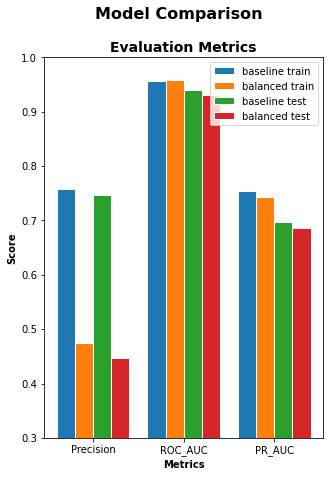

In [152]:
# Intitialize figure with two plots
fig, ax = plt.subplots()
fig.suptitle('Model Comparison', fontsize=16, fontweight='bold')
fig.set_figheight(7)
fig.set_figwidth(5)
fig.set_facecolor('white')



barWidth = 0.2
baseline_train_score = [precision_train_baseline,  roc_auc_trainbaseline, PR_AUC_trainbaseline]
balanced_train_score = [precision_train_balanced,roc_auc_trainbalanced, PR_AUC_trainbalanced  ]
# downsam_train_score = [precision_train_downsam, roc_auc_traindownsam , PR_AUC_traindownsam]
baseline_test_score = [precision_test_baseline, roc_auc_testbaseline, PR_AUC_testbaseline ]
balanced_test_score = [precision_test_balanced, roc_auc_testbalanced, PR_AUC_testbalanced ]
# downsam_test_score = [precision_test_downsam, roc_auc_testdownsam , PR_AUC_testdownsam]

## Set position of bar on X axis
r1 = np.arange(len(baseline_train_score))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
#r5 = [x + barWidth for x in r4]
#r6 = [x + barWidth for x in r5]

# Make the plot
ax.bar(r1, baseline_train_score, width=barWidth, edgecolor='white', label='baseline train')
ax.bar(r2, balanced_train_score , width=barWidth, edgecolor='white', label='balanced train')
#ax1.bar(r3, downsam_train_score , width=barWidth, edgecolor='white', label='downsampling train')
ax.bar(r3, baseline_test_score , width=barWidth, edgecolor='white', label='baseline test')
ax.bar(r4, balanced_test_score , width=barWidth, edgecolor='white', label='balanced test')
# ax1.bar(r6, downsam_test_score  , width=barWidth, edgecolor='white', label='downsampling test')

## Configure x and y axis
ax.set_xlabel('Metrics', fontweight='bold')
labels = ['Precision', 'ROC_AUC', 'PR_AUC']
ax.set_xticks([r + (barWidth * 1.5) for r in range(len(baseline_train_score))], )
ax.set_xticklabels(labels)
ax.set_ylabel('Score', fontweight='bold')
ax.set_ylim(0.3, 1)

## Create legend & title
ax.set_title('Evaluation Metrics', fontsize=14, fontweight='bold')
ax.legend()


plt.show()

In [ ]:
# First plot

# Intitialize figure with two plots
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Model Comparison', fontsize=16, fontweight='bold')
fig.set_figheight(7)
fig.set_figwidth(14)
fig.set_facecolor('white')
## set bar size
barWidth = 0.2
dtc_score = [dtc_eval['acc'] , dtc_eval['prec'], dtc_eval['rec'], dtc_eval['f1'], dtc_eval['kappa']]
rf_score = [rf_eval['acc'], rf_eval['prec'], rf_eval['rec'], rf_eval['f1'], rf_eval['kappa']]
nb_score = [nb_eval['acc'], nb_eval['prec'], nb_eval['rec'], nb_eval['f1'], nb_eval['kappa']]
knn_score = [knn_eval['acc'], knn_eval['prec'], knn_eval['rec'], knn_eval['f1'], knn_eval['kappa']]

## Set position of bar on X axis
r1 = np.arange(len(dtc_score))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]

# Make the plot
ax1.bar(r1, dtc_score, width=barWidth, edgecolor='white', label='Decision Tree')
ax1.bar(r2, rf_score, width=barWidth, edgecolor='white', label='Random Forest')
ax1.bar(r3, nb_score, width=barWidth, edgecolor='white', label='Naive Bayes')
ax1.bar(r4, knn_score, width=barWidth, edgecolor='white', label='K-Nearest Neighbors')

## Configure x and y axis
ax1.set_xlabel('Metrics', fontweight='bold')
labels = ['Accuracy', 'Precision', 'Recall', 'F1', 'Kappa']
ax1.set_xticks([r + (barWidth * 1.5) for r in range(len(dtc_score))], )
ax1.set_xticklabels(labels)
ax1.set_ylabel('Score', fontweight='bold')
ax1.set_ylim(0, 1)



## Create legend & title
ax1.set_title('Evaluation Metrics', fontsize=14, fontweight='bold')
ax1.legend()

# Second plot
## Comparing ROC Curve
ax2.plot(dtc_eval['fpr'], dtc_eval['tpr'], label='Decision Tree, auc = {:0.5f}'.format(dtc_eval['auc']))
ax2.plot(rf_eval['fpr'], rf_eval['tpr'], label='Random Forest, auc = {:0.5f}'.format(rf_eval['auc']))
ax2.plot(nb_eval['fpr'], nb_eval['tpr'], label='Naive Bayes, auc = {:0.5f}'.format(nb_eval['auc']))
ax2.plot(knn_eval['fpr'], knn_eval['tpr'], label='K-Nearest Nieghbor, auc = {:0.5f}'.format(knn_eval['auc']))

## Configure x and y axis
ax2.set_xlabel('False Positive Rate', fontweight='bold')
ax2.set_ylabel('True Positive Rate', fontweight='bold')

## Create legend & title
ax2.set_title('ROC Curve', fontsize=14, fontweight='bold')
ax2.legend(loc=4)

plt.show()

In [153]:
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline
import numpy as np
import pandas as pd
# import seaborn as sns



In [154]:
df1= pd.read_csv('/Users/cuicuisong/Desktop/claim.csv', encoding='latin-1')

Text(0, 0.5, 'Score')

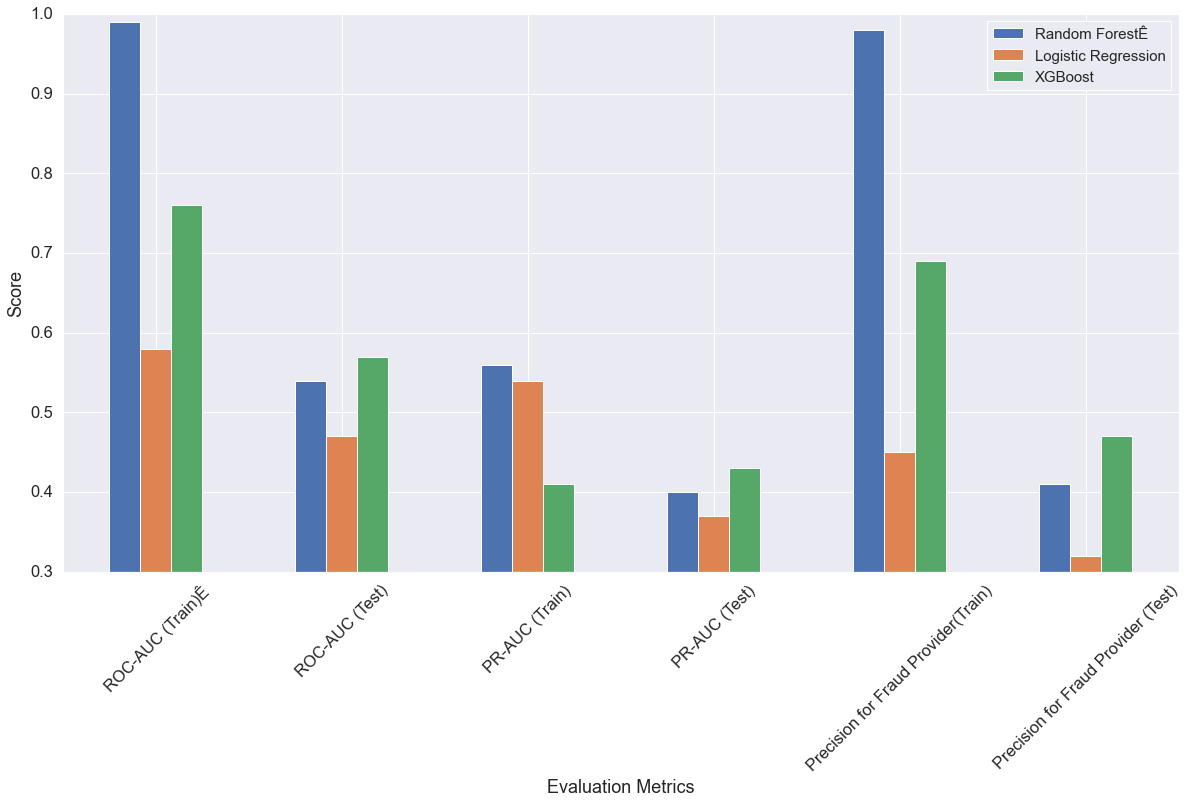

In [156]:
sns.set(rc={'figure.figsize':(20,10)})
sns.set(font_scale=1.5)
df1.set_index('Evaluation Metrics').plot.bar()
plt.ylim(0.3,1.0)
plt.legend(fontsize=15)
plt.xticks(rotation=45)
plt.ylabel('Score')